In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import IPython.display as ipd
import sklearn
import crepe

In [12]:
# Load the WAV file
#audio_file = "./101_mono.wav"

#y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sampling rate

#Display audio
#ipd.Audio(audio_file)

In [13]:
def generate_fake_audio(duration, sample_rate):
    """
    Generate fake audio data.

    Args:
    - duration (float): Duration of the audio signal in seconds.
    - sample_rate (int): Sampling rate of the audio signal.

    Returns:
    - numpy.ndarray: Fake audio data.
    """
    # Calculate the number of samples
    num_samples = int(duration * sample_rate)

    # Generate a random audio signal (e.g., white noise)
    audio_data = np.random.normal(0, 1, num_samples)

    return audio_data

# Example usage:
duration = 5  # 5 seconds
sample_rate = 44100  # 44.1 kHz
y = generate_fake_audio(duration, sample_rate)

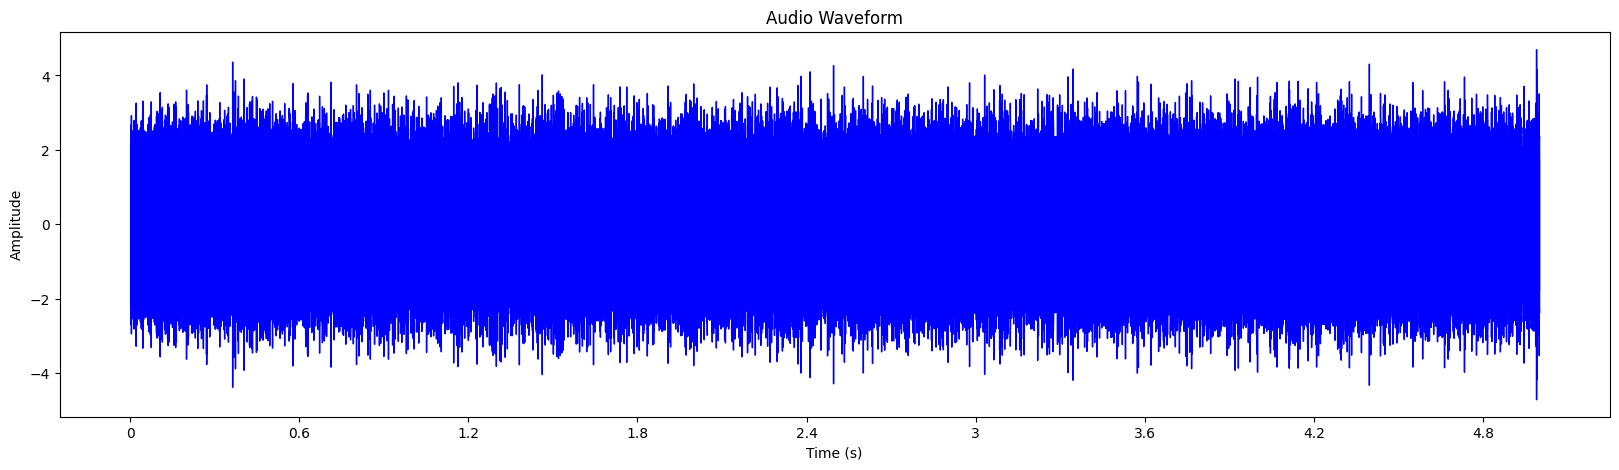

In [14]:
#Show audio waveform
plt.figure(figsize=(20, 5))
librosa.display.waveshow(y, sr=sample_rate, color="blue")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

In [15]:
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
n_fft=1024

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=320

# Specify the window type for FFT/STFT
window_type ='hann'

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type)) ** 2

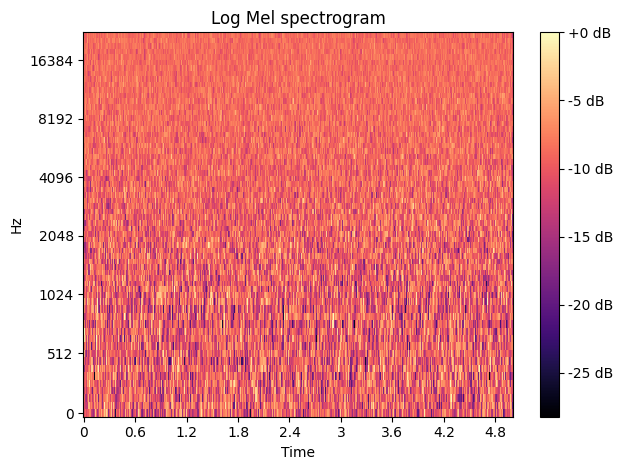

In [16]:
#Log Mel Spectrogram
mel_bins = 64 # Number of Mel bands
fmin = 0
fmax = None
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels = mel_bins, power=2.0)


mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.show()

In [17]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=13)  # You can adjust the number of MFCC coefficients (n_mfcc)

# Save MFCCs as a CSV file
mfccs_df = pd.DataFrame(mfccs)
mfccs_df.to_csv("mfccs.csv", index=False)

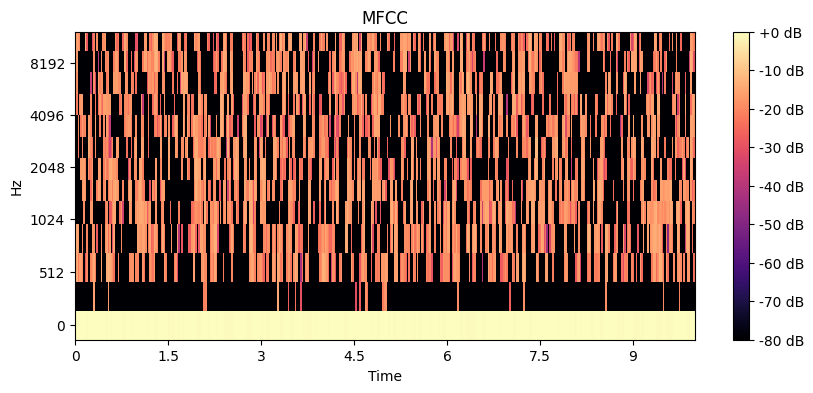

In [18]:
# Visualize the MFCCs
plt.figure(figsize=(10, 4))

librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='mel', x_axis='time')

plt.colorbar(format='%+2.0f dB')

plt.title('MFCC')

plt.show()

In [19]:
#Computing ZERO-CROSSING RATE
# Zooming in (won't be necessary when segmentation is done)
n0 = 9000
n1 = 9100
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

57


In [ ]:
#requisit for Crepe
#pip install tensorflow

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 750ms/step
At time 0.00 seconds, estimated pitch is 32.25 Hz
At time 0.01 seconds, estimated pitch is 32.93 Hz
At time 0.02 seconds, estimated pitch is 33.30 Hz
At time 0.03 seconds, estimated pitch is 33.53 Hz
At time 0.04 seconds, estimated pitch is 34.21 Hz
At time 0.05 seconds, estimated pitch is 34.86 Hz
At time 0.06 seconds, estimated pitch is 32.52 Hz
At time 0.07 seconds, estimated pitch is 32.36 Hz
At time 0.08 seconds, estimated pitch is 32.26 Hz
At time 0.09 seconds, estimated pitch is 32.29 Hz
At time 0.10 seconds, estimated pitch is 32.55 Hz
At time 0.11 seconds, estimated pitch is 33.79 Hz
At time 0.12 seconds, estimated pitch is 33.06 Hz
At time 0.13 seconds, estimated pitch is 32.68 Hz
At time 0.14 seconds, estimated pitch is 32.69 Hz
At time 0.15 seconds, estimated pitch is 32.33 Hz
At time 0.16 seconds, estimated pitch is 32.49 Hz
At time 0.17 seconds, estimated pitch is 32.42 Hz
At time 0.18 seconds, estimated pitch is 32.39 Hz
At time 

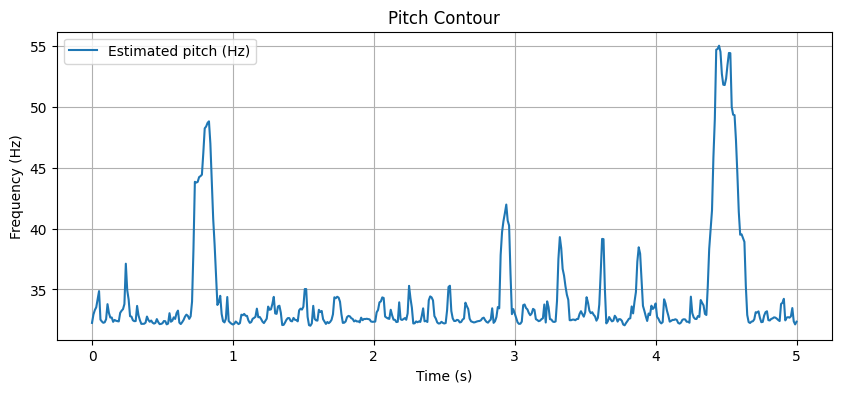

In [21]:
#Pitch extraction
# Extract pitch with Crepe
time, frequency, confidence, activation = crepe.predict(y, sample_rate, viterbi=True)

# Print the estimated pitch (in Hz) at each time step
for t, f in zip(time, frequency):
    print(f"At time {t:.2f} seconds, estimated pitch is {f:.2f} Hz")

# Plot the pitch contour
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(time, frequency, label='Estimated pitch (Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Contour')
plt.grid(True)
plt.legend()
plt.show()